<a href="https://colab.research.google.com/github/islamhanii/CNN/blob/main/CV_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 256)             

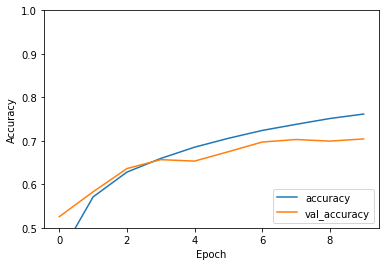

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, metrics, optimizers
 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
 
train_images, test_images = train_images / 255.0, test_images / 255.0
 
model = models.Sequential()
 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
 
model.compile(optimizer="adam", loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
 
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, 
                    validation_data=(test_images, test_labels))
 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)